# Long Run Analysis

400_*.output
Image_Data/Output/400_63870511_slurm.output
Image_Data/Output/400_63846883_slurm.output


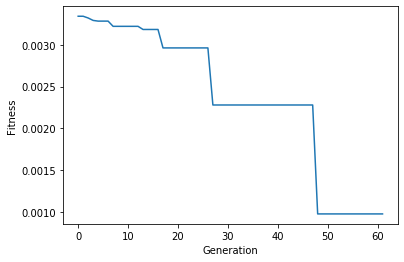

In [132]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path


# 3, 60 is a good example of a locla minima from bullseye
# 12, 50, 100 exaample of better than Ground Truth.
# 15 cat's Eyes
# 36, 300 Example of not a great solution but below 0.1
# 200 Examples of good solutions but not perfect. 
# 400 Good solution

prefix = 400
folder = 'Image_Data/Output/'

def evaluate_run(prefix = 0, folder='./'):
    p = Path(folder)
    filefilter = f'{prefix}_*.output'
    print(filefilter)
    filenames = list(p.glob(filefilter))

    assert(len(filenames) > 0)

    fitness = []
    pop = []
    dist = []
    for filename in filenames:
        print(filename)
        fid  = open(filename, 'r')
        lines = fid.readlines() 
        for line in lines:
            if 'BEST' in line:
                fitness.append(eval(line.split('-')[1]))
                pop.append(eval(line.split(' - ')[2]))
            if 'HIST' in line:
                dist.append(eval(line.split('-')[1]))

    fitness = np.array(fitness)
    fitness = list(fitness[:,0])
    fitness.sort(reverse=True)
    plt.plot(fitness)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.savefig(f'{filename}.png')
    return fitness, pop, dist

fitness_list, pop, dist = evaluate_run(prefix, folder=folder)

In [133]:
for threshold in np.arange(1,0,-0.1):
    print(np.sum(np.array(fitness_list) > threshold))

0
0
0
0
0
0
0
0
0
0


In [134]:
from see import DataDownload as dd
imagefiles = []
maskfiles = []
outputfiles = []

print("Adding COSKEL Data")
files = dd.getCOSKELFolderlists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

print("Adding Sky Data")
files = dd.getSkyFolderLists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

Adding COSKEL Data
Adding Sky Data


./Image_Data//sky/data/0117.jpg
['FB', 3353, 0.507, 8384, 0.32, 4541, 2556, 10, 0.36, 5915, 6183, 4, 3, 0.01, 0.78, (1, 2), 2.7, 'disk', 'checkerboard', 6, 5848, 35, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'fitness=0.0009775374376039933')

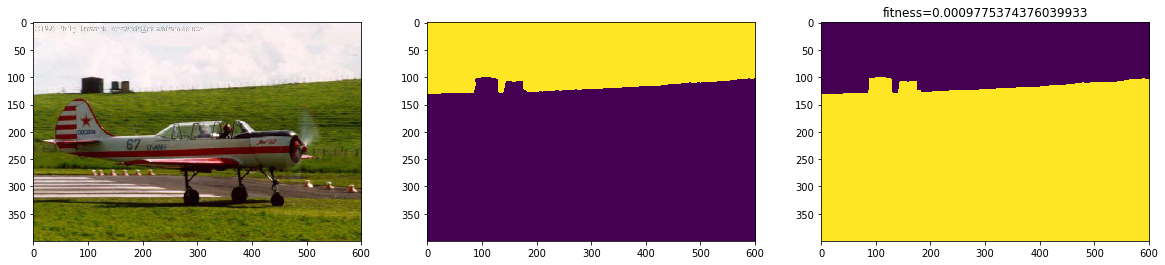

In [135]:
import imageio
from see import Segmentors
from see import JupyterGUI


print(imagefiles[prefix])
img = imageio.imread(imagefiles[prefix])
gmask = imageio.imread(maskfiles[prefix])
params = pop[-1]
print(params)
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)
fitness,_,_ = Segmentors.FitnessFunction(mask,gmask)
JupyterGUI.showthree(img, gmask, mask)
plt.title(f"fitness={fitness}")


In [136]:
test = []
keys = None
for d in dist:
    test.append(list(d.values()));
    keys = list(d.keys())
    
array = np.array(test)

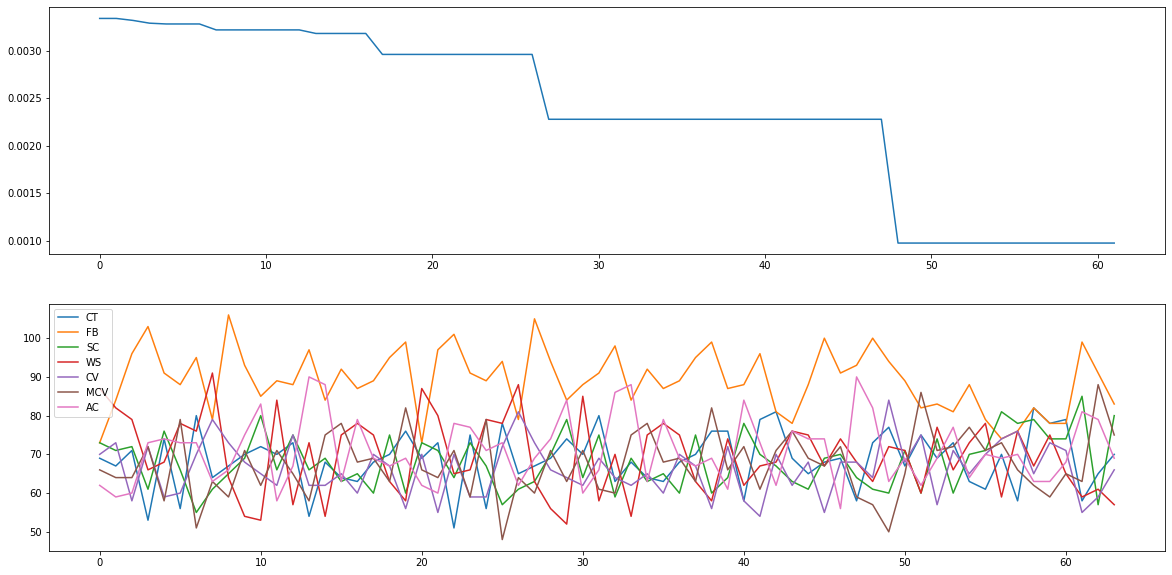

In [137]:
if keys:
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(fitness_list);
    plt.subplot(212)
    plt.plot(array);
    plt.legend(keys)

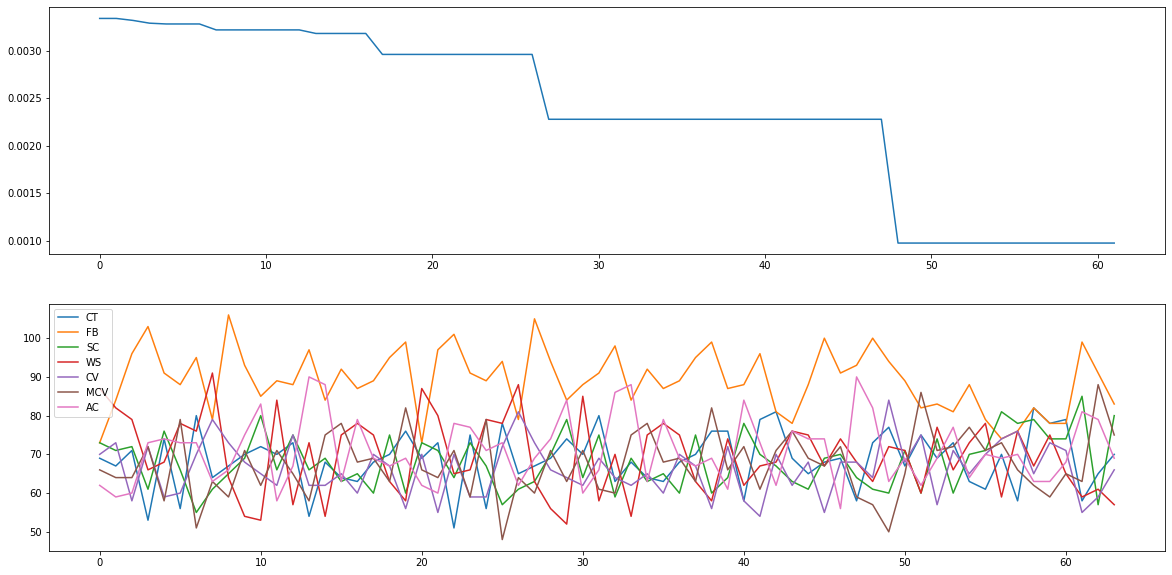

In [138]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(fitness_list);
plt.subplot(212)
plt.plot(array);
plt.legend(keys)

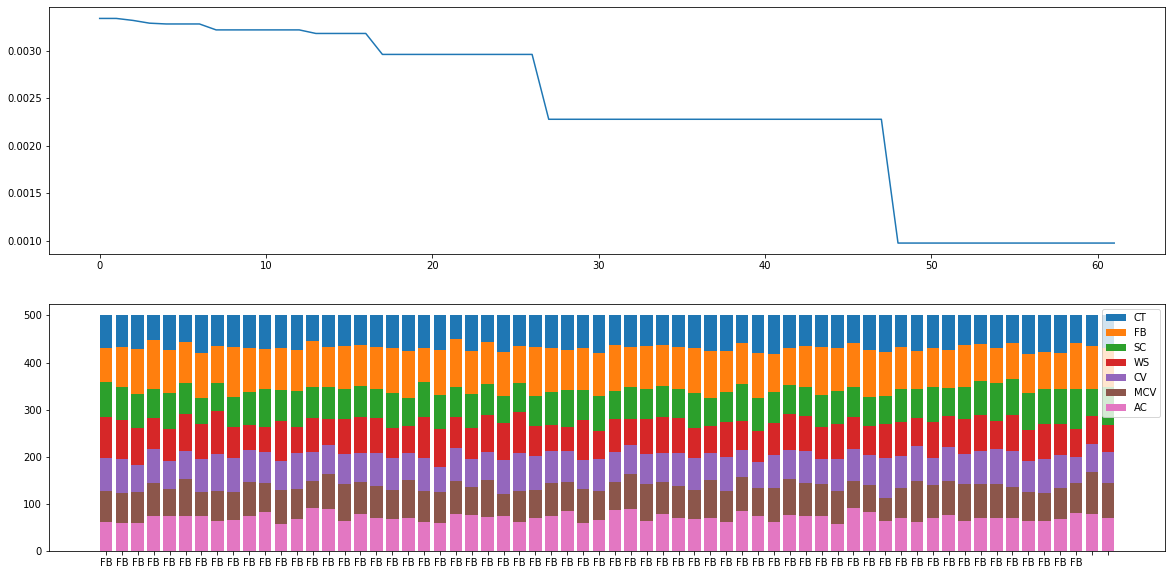

In [139]:
import copy

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(fitness_list);
plt.subplot(212)
ind = list(range(array.shape[0]))
shrinkray = array
index = 0
winners = []
for k in keys:
    totals = np.sum(shrinkray.T,axis=0).tolist()
    plt.bar(ind, totals, label=k);
    shrinkray = shrinkray[:,1:]

plt.legend()

winners = list(np.array(pop)[:,0])
plt.xticks(ind, winners);
    